### выполнила студентка группы ПИ19-1В Ли Валерия

# Wine Quality 

## 1. Понимание бизнеса

### Цель

Предсказать качество/свойства вин

### Описание

Два набора данных связаны с красным и белым вариантами португальского вина "Vinho Verde". Из-за проблем конфиденциальности и логистики доступны только физико-химические (входные) и сенсорные (выходные) переменные (например, нет данных о сортах винограда, марке вина, цене продажи вина и т.д.).

Эти наборы данных можно рассматривать как задачи классификации или регрессии. Классы упорядочены и не сбалансированы (например, нормальных вин гораздо больше, чем отличных или плохих). Для выявления нескольких отличных или плохих вин можно использовать алгоритмы обнаружения выбросов. Кроме того, мы не уверены, что все входные переменные релевантны. Поэтому было бы интересно протестировать методы отбора признаков.


Входные переменные (основанные на физико-химических тестах): 
1 - фиксированная кислотность 
2 - летучая кислотность 
3 - лимонная кислота 
4 - остаточный сахар 
5 - хлориды 
6 - свободный диоксид серы 
7 - общий диоксид серы 
8 - плотность 
9 - рН 
10 - сульфаты 
11 - спирт 
Выходная переменная (на основе сенсорных данных): 
12 - качество (оценка от 0 до 10)


## 2. Data Understanding

### Import Libraries

In [243]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

### Загрузка данных

In [244]:
wine_dataset = pd.read_csv('winequality.csv')

In [245]:
wine_dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [246]:
wine_dataset.shape

(6497, 13)

Набор данных состоит из 6497 наблюдений и 13 характеристик, из которых одна является зависимой переменной, а остальные 12 являются независимыми переменными - физико-химическими характеристиками

### Статистика и визуализация

In [247]:
wine_dataset.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [248]:
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [249]:
wine_dataset.isna().sum().sort_values(ascending=False)

fixed acidity           10
pH                       9
volatile acidity         8
sulphates                4
citric acid              3
residual sugar           2
chlorides                2
type                     0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
alcohol                  0
quality                  0
dtype: int64

Несколько столбцов имеют пропущенные значения, столбец "acidity" имеет наибольшее количество пропущенных значений

В значениях 7 переменных есть нули

In [250]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Заметно большая разница в 75%-м и максимальном значениях предикторов "остаточный сахар", "свободный диоксид серы", "общий диоксид серы". Наблюдение предполагает, что в наборе данных есть экстремальные значения — выбросы.
Некоторые вина слабые, т.е. алкоголь <10. Некоторые вина соленые, т.е. хлориды >0,06. Брожение не закончилось для некоторых вин, т.е. плотность >1. Некоторые вина более кислотные, чем другие, так как средний показатель составляет 3,21, а максимальный - 4,01. Некоторые вина сладкие, т.е. остаточный сахар > 5.

In [251]:
wine_dataset['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

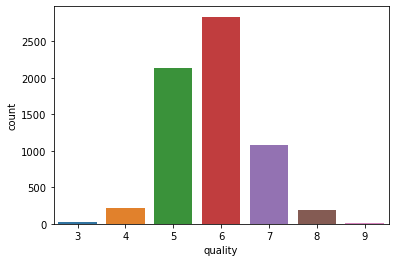

In [252]:
sns.countplot(x='quality', data=wine_dataset)

Набор данных несбалансирован и в отношении качества вина.

Больше всего вин с качественной оценкой 6; 5 вин с максимальной оценкой 9; 30 с минимальной оценкой 3.

In [253]:
correlation = wine_dataset.corr()

<AxesSubplot:>

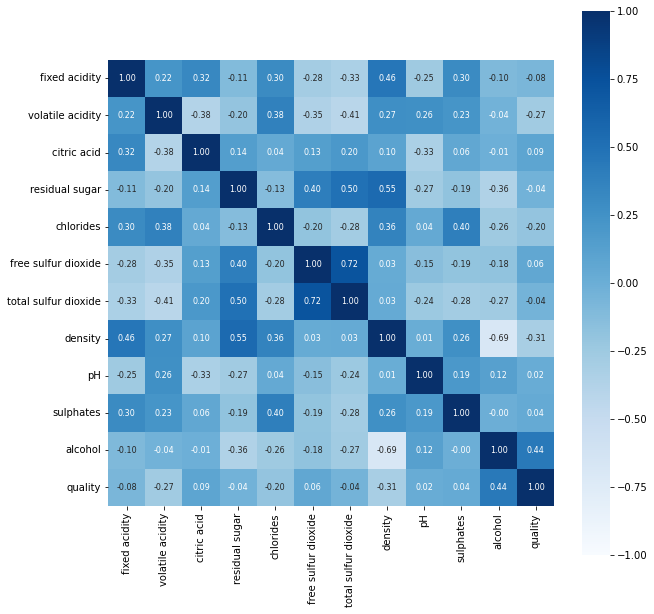

In [254]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', 
            vmin=-1, vmax=1, annot=True, annot_kws={'size': 8}, cmap='Blues')

`Плотность` и `алкоголь` отрицательно коррелируют, а `свободный диоксид серы` и `общий диоксид серы` положительно коррелируют. Наиболее сильный признак, который коррелирует с `качеством` - это `алкоголь` и `плотность`

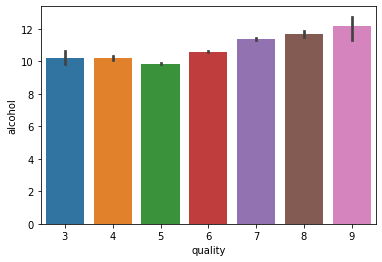

In [255]:
sns.barplot(x='quality', y='alcohol', data=wine_dataset)
plt.show()

С увелечением `алкоголя` растет `качество`

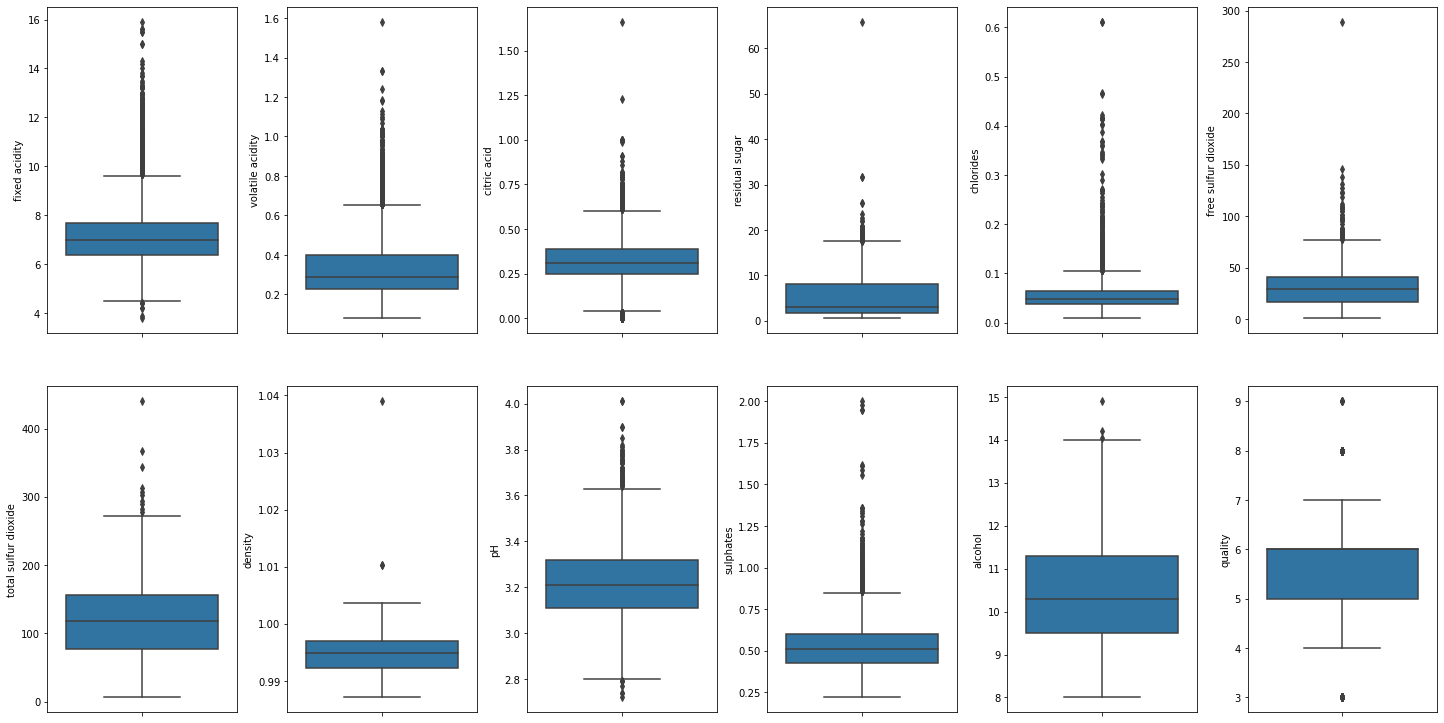

In [256]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in wine_dataset.items():
    if col != 'type':
        sns.boxplot(y=col, data=wine_dataset, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

## 3. Data Preparation 

Замена значений категориальных переменных dummy-кодированием

In [257]:
wine_dataset['type'] = wine_dataset['type'].astype("category").cat.codes

In [258]:
wine_dataset

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Мы заменим отсутствующие значения средним значением столбца

In [259]:
missing_val_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'pH', 'sulphates']

for col in missing_val_cols:
    mean = wine_dataset[col].mean()
    wine_dataset[col].fillna(mean, inplace=True)
    


In [260]:
wine_dataset.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## 4. Моделирование

Разделим наши данные две части, X, которая содержит данные для классификации и y, которая содержит известные результаты. Рассмотрим переменную X, в данном случае, колонка `качество` должна быть преобразована для лучшей классификации. Для этого используем one-hot encoding (значение 1, если качество выше или равно 5 и значение 0, при качестве ниже 5)

In [261]:
X = wine_dataset.drop('quality', axis=1)
# X = wine_dataset['alcohol'].to_frame()
y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=5 else 0)
#y = wine_dataset['quality']

Разделение данных на обучающие и тестовые данные

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4872, 12) (1625, 12) (4872,) (1625,)


In [263]:
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.transform(X_test)

              precision    recall  f1-score   support

           0       0.80      0.06      0.11        69
           1       0.96      1.00      0.98      1556

    accuracy                           0.96      1625
   macro avg       0.88      0.53      0.54      1625
weighted avg       0.95      0.96      0.94      1625



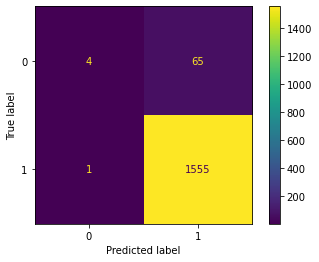

In [264]:
log_model = LogisticRegression(max_iter=200, random_state=12)

log_model.fit(scaled_X_train, y_train)

y_pred = log_model.predict(scaled_X_test)

accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred, zero_division=True))

ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test)

In [265]:
def logic_regression_for_each_feature(column_name : str) -> None:  
    model = LogisticRegression(max_iter=700, random_state=12).fit(X_train[[column_name]].values, y_train.values)
    y_pred = model.predict(X_test[[column_name]].values)
    accuracy = model.score(X_test[[column_name]].values,  y_test.values)
    
    print(f"Accuracy: {accuracy}")

In [266]:
for i in X_train.columns:
    logic_regression_for_each_feature(i)

Accuracy: 0.9575384615384616
Accuracy: 0.9575384615384616
Accuracy: 0.9575384615384616
Accuracy: 0.9575384615384616
Accuracy: 0.9575384615384616
Accuracy: 0.9575384615384616
Accuracy: 0.9575384615384616
Accuracy: 0.9575384615384616
Accuracy: 0.9575384615384616
Accuracy: 0.9575384615384616
Accuracy: 0.9575384615384616
Accuracy: 0.9575384615384616


              precision    recall  f1-score   support

           0       0.60      0.09      0.15        69
           1       0.96      1.00      0.98      1556

    accuracy                           0.96      1625
   macro avg       0.78      0.54      0.57      1625
weighted avg       0.95      0.96      0.94      1625



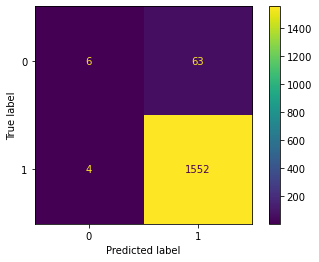

In [267]:
rf_model = RandomForestClassifier(random_state=12)

rf_model.fit(scaled_X_train, y_train)

y_pred = rf_model.predict(scaled_X_test)

accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred, zero_division=True))

ConfusionMatrixDisplay.from_estimator(rf_model, scaled_X_test, y_test)

In [268]:
def random_forest_for_each_feature(column_name : str) -> None:
    model = RandomForestClassifier(random_state=12).fit(X_train[[column_name]].values, y_train.values)
    y_pred = model.predict(X_test[[column_name]].values)
    accuracy = model.score(X_test[[column_name]].values,  y_test.values)
    print(f"Accuracy: {accuracy}")

In [269]:
for i in X_train.columns:
    random_forest_for_each_feature(i)

Accuracy: 0.9575384615384616
Accuracy: 0.9569230769230769
Accuracy: 0.9556923076923077
Accuracy: 0.9575384615384616
Accuracy: 0.9575384615384616
Accuracy: 0.9575384615384616
Accuracy: 0.9581538461538461
Accuracy: 0.9575384615384616
Accuracy: 0.9544615384615385
Accuracy: 0.9563076923076923
Accuracy: 0.9569230769230769
Accuracy: 0.9569230769230769


Модели одинаково хорошо работают